# Data Visualization: The MICA-MICS Dataset

**Project:** Concept-Driven Disentanglement for Interpretable SC-FC Coupling

**Paper Reference:** *A Concept-Driven Disentanglement Framework for Interpretable Graph Neural Networks in Structure-Function Coupling*

## Overview
This notebook loads and visualizes the three core matrices used in this study. The data is derived from the **MICA-MICS** dataset, processed using the **Schaefer 100-parcel** atlas.

## Data Modalities
1.  **Structural Connectivity (SC):** Represents the physical white matter connections between brain regions (streamline counts). This is the **input** to our GNN.
2.  **Functional Connectivity (FC):** Represents the temporal correlation of BOLD signals between regions (fMRI). This is the **target** our model aims to predict.
3.  **Euclidean Distance (Length):** Represents the physical distance between the centroids of brain regions. This is used to define the "Short-Range vs. Long-Range" concept masks.

**Format:** Data is provided as pre-processed `.npy` files for ease of reproduction.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define paths (Assumes data is in the same directory or a 'data' subfolder)
# Note: Ensure these .npy files are present in your working directory
fc_path = 'MICA_FC_data_100p.npy'
sc_path = 'MICA_SC_data_100p.npy'
len_path = 'MICA_length_data_100p.npy'

# Load the matrices
try:
    fc = np.load(fc_path)
    sc = np.load(sc_path)
    length = np.load(len_path)
    print("Data loaded successfully.")

    # Check dimensions
    # Expected: (Num_Subjects, Regions, Regions) -> (N, 100, 100)
    print(f"FC Shape: {fc.shape}")
    print(f"SC Shape: {sc.shape}")
    print(f"Length Shape: {length.shape}")

except FileNotFoundError:
    print("Error: .npy files not found. Please ensure the MICA-MICS data is downloaded.")

Data loaded successfully.
FC Shape: (50, 116, 116)
SC Shape: (50, 116, 116)
Length Shape: (50, 116, 116)


## 2. Min-Max Normalization
To ensure stability during GNN training, we apply Min-Max normalization.
**Important:** Normalization is applied **per subject** (independently for each matrix). This preserves the relative topology of an individual's brain network while scaling values to the range $[0, 1]$.

$$X_{norm} = \frac{X - \min(X)}{\max(X) - \min(X) + \epsilon}$$

In [ ]:
# Normalize the SC, FC, and Length data
eps = 1e-8 # Small epsilon to prevent division by zero

# 1. Structural Connectivity (Input)
SC_min = sc.min(axis=(1, 2), keepdims=True)
SC_max = sc.max(axis=(1, 2), keepdims=True)
sc = (sc - SC_min) / (SC_max - SC_min + eps)

# 2. Functional Connectivity (Target)
FC_min = fc.min(axis=(1, 2), keepdims=True)
FC_max = fc.max(axis=(1, 2), keepdims=True)
fc = (fc - FC_min) / (FC_max - FC_min + eps)

# 3. Euclidean Distance (Concept Definition)
length_min = length.min(axis=(1, 2), keepdims=True)
length_max = length.max(axis=(1, 2), keepdims=True)
length = (length - length_min) / (length_max - length_min + eps)

print(f"Normalization complete. SC Range: [{sc.min():.2f}, {sc.max():.2f}]")

Normalization complete. SC Range: [0.00, 1.00]


## 3. Visual Inspection
We visualize the three matrices for the first 5 subjects to verify data quality.
* **FC Matrix:** Should show strong diagonal (self-connection) and block-like modular structure.
* **SC Matrix:** Sparse structure (mostly black), as white matter tracts do not connect every region to every other region.
* **Length Matrix:** Smooth gradients representing physical distance.

--- Generating Visualizations for First 5 Subjects ---


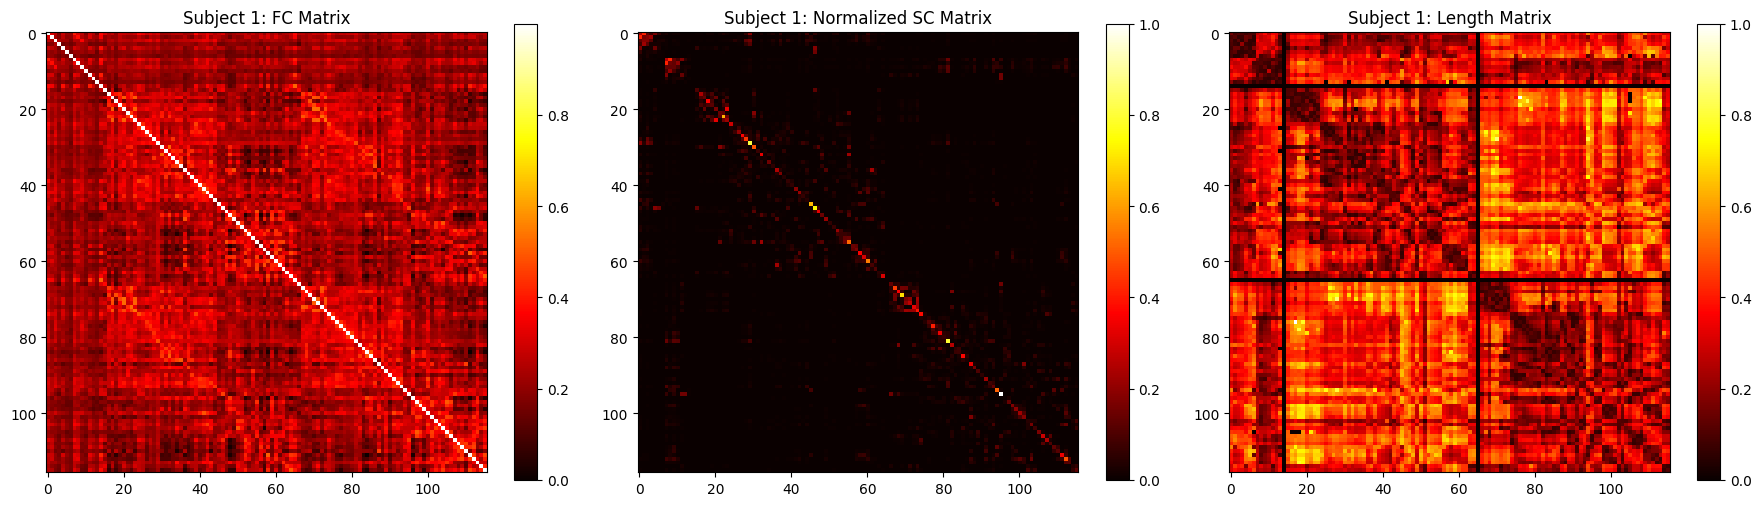

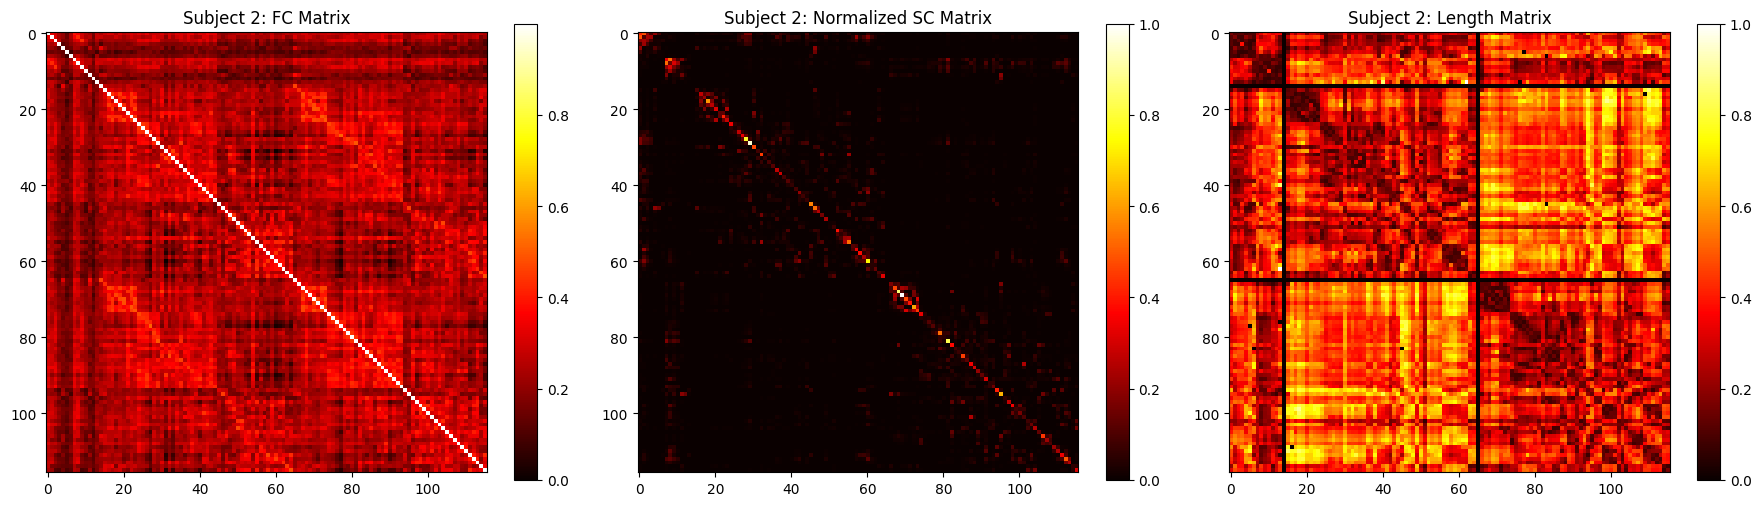

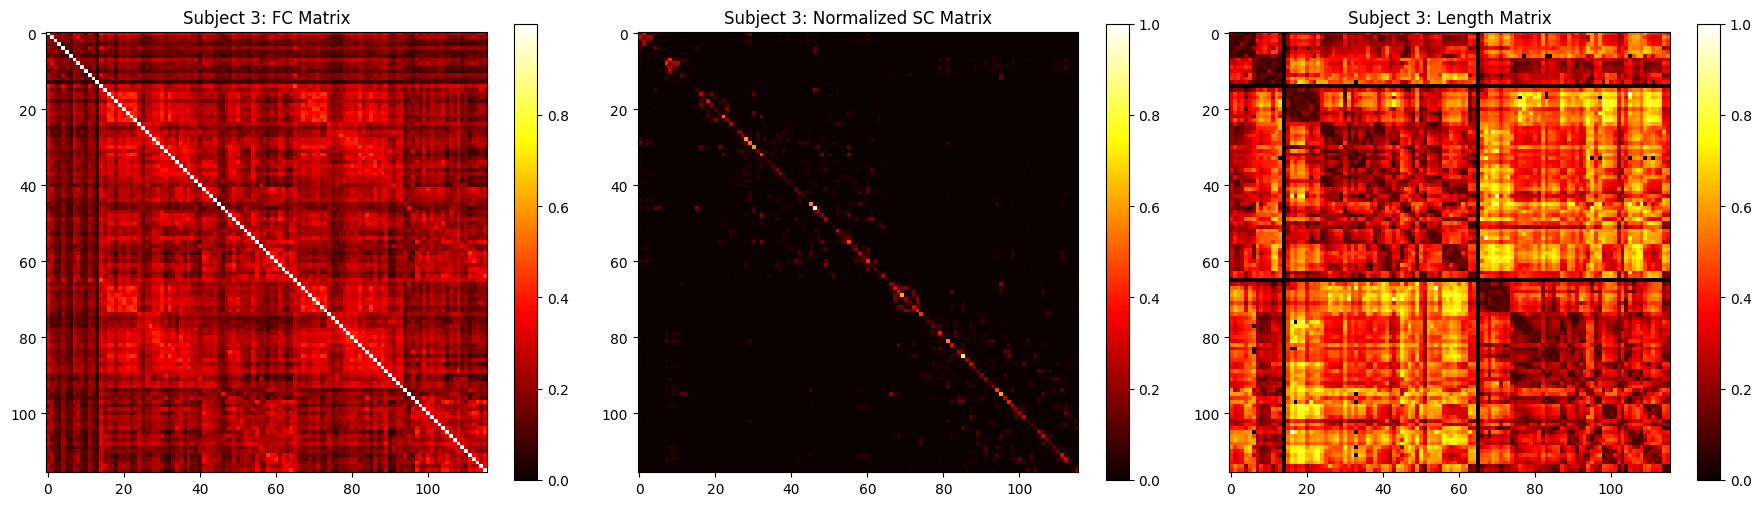

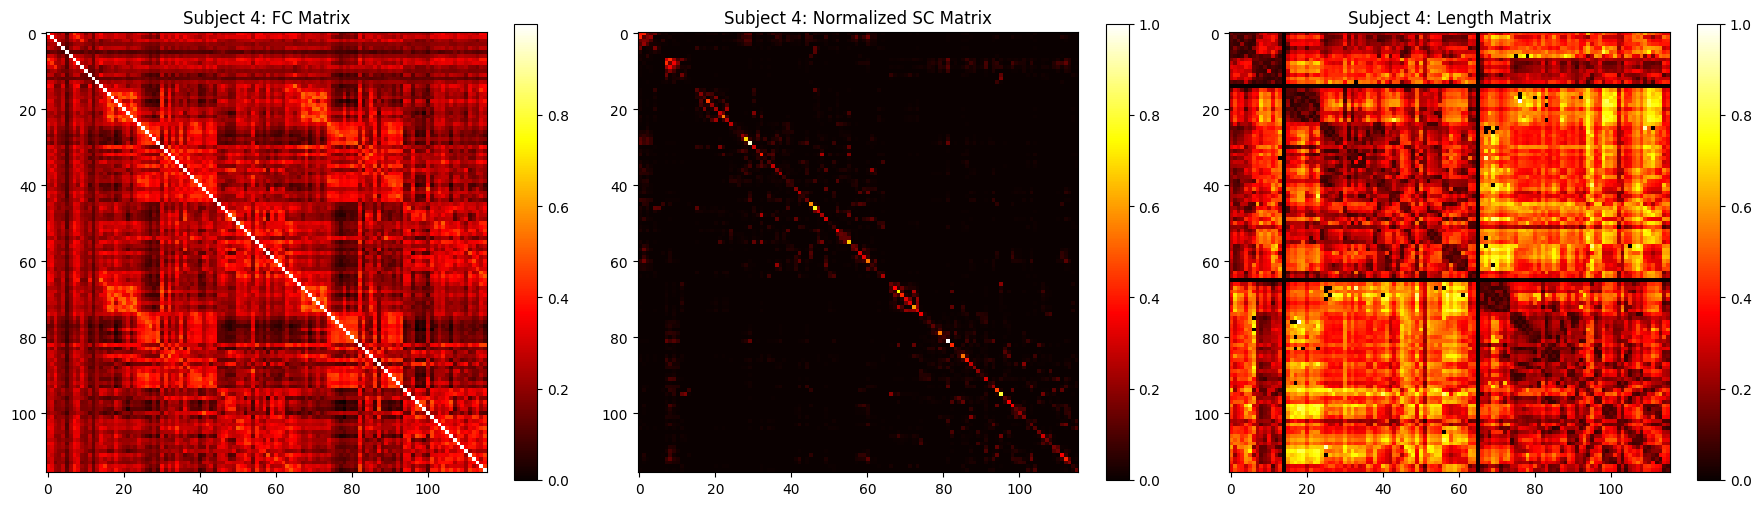

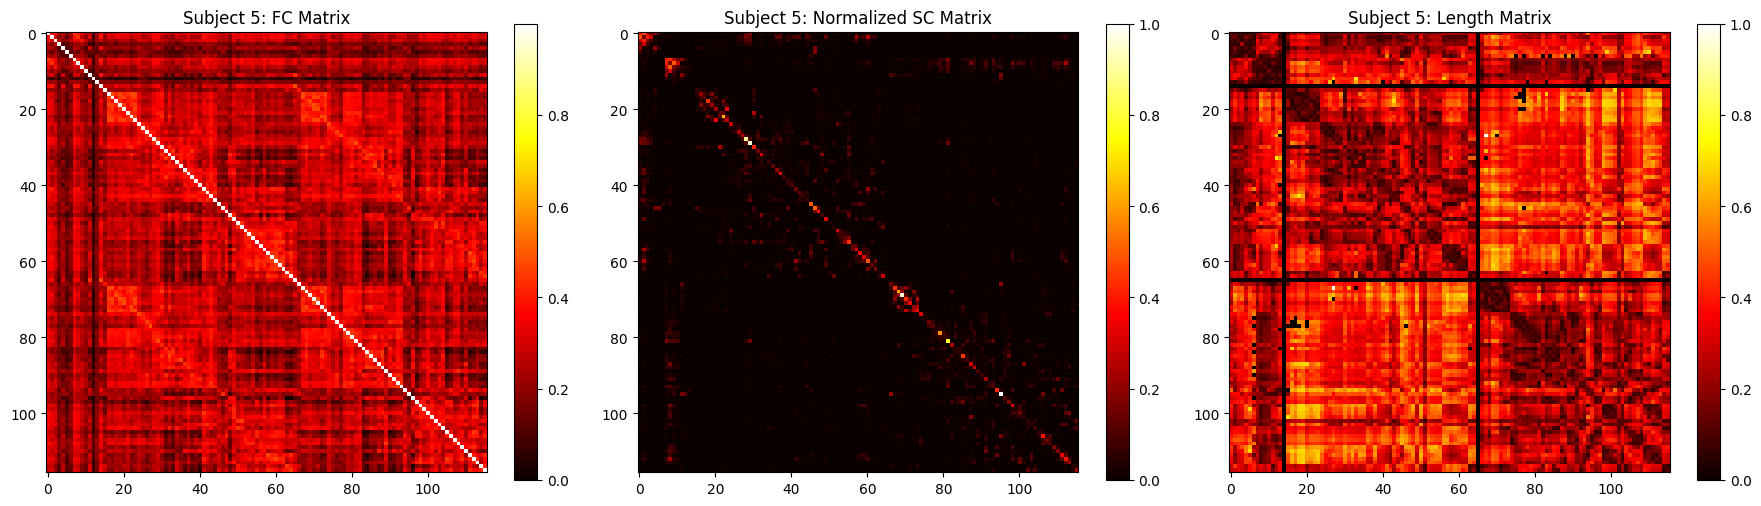

In [ ]:
print("--- Generating Visualizations for First 5 Subjects ---")

for i in range(5):
    # Setup figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Plot FC
    im1 = axes[0].imshow(fc[i], cmap='hot', interpolation='nearest')
    axes[0].set_title(f'Subject {i+1}: FC Matrix')
    fig.colorbar(im1, ax=axes[0])

    # Plot SC
    im2 = axes[1].imshow(sc[i], cmap='hot', interpolation='nearest')
    axes[1].set_title(f'Subject {i+1}: Normalized SC Matrix')
    fig.colorbar(im2, ax=axes[1])

    # Plot Length
    im3 = axes[2].imshow(length[i], cmap='hot', interpolation='nearest')
    axes[2].set_title(f'Subject {i+1}: Length Matrix')
    fig.colorbar(im3, ax=axes[2])

    plt.tight_layout()

    plt.show()